In [1]:
# importing some commonly required libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import io
import unicodedata
import numpy as np
import re
import string
import pickle
import math
import random
import collections
import os,glob


In [2]:
from collections import Counter
from collections import defaultdict

from indicnlp.tokenize import sentence_tokenize
from indicnlp.tokenize import indic_tokenize
from indicnlp import common
common.INDIC_RESOURCES_PATH="./../ExternalDependencies/indic_nlp_resources"

In [3]:
# generating a list of stopwords
stopwords = []
with open('./stopwords.txt') as f:
    stopwords = f.read().splitlines()

In [48]:
# Class used for data analysis
class Analysis:
    def __init__(self,basePath,cleanType=0):
        self.documents=[]
        self.documentDicts=[]
        #Get Sentences and Words for each file
        allWords=[]
        for file in glob.glob(os.path.join(basePath, '*')):
            with open(file, 'r+') as f:
                text = f.read()
                rawSentences=sentence_tokenize.sentence_split(text,lang='hi')
                document=[]
                for rawSentence in rawSentences:
                    # Cleaing sentences
                    cleanSentence=self.__get_clean_tokens(rawSentence,cleanType)
                    document.append(cleanSentence)
                self.documents.append(document)
        #Get word count for each document and all documents
        for document in self.documents:
            words=[]
            for sentence in document:
                for word in sentence:
                    words.append(word)
                    allWords.append(word)
            temp=Counter(words)
            self.documentDicts.append(temp)
        self.wordDict=Counter(allWords)
    
    # function to get stop words
    def generate_stem_word(self, word):
        suffixes = {
    1: [u"ो",u"े",u"ू",u"ु",u"ी",u"ि",u"ा"],
    2: [u"कर",u"ाओ",u"िए",u"ाई",u"ाए",u"ने",u"नी",u"ना",u"ते",u"ीं",u"ती",u"ता",u"ाँ",u"ां",u"ों",u"ें"],
    3: [u"ाकर",u"ाइए",u"ाईं",u"ाया",u"ेगी",u"ेगा",u"ोगी",u"ोगे",u"ाने",u"ाना",u"ाते",u"ाती",u"ाता",u"तीं",u"ाओं",u"ाएं",u"ुओं",u"ुएं",u"ुआं"],
    4: [u"ाएगी",u"ाएगा",u"ाओगी",u"ाओगे",u"एंगी",u"ेंगी",u"एंगे",u"ेंगे",u"ूंगी",u"ूंगा",u"ातीं",u"नाओं",u"नाएं",u"ताओं",u"ताएं",u"ियाँ",u"ियों",u"ियां"],
    5: [u"ाएंगी",u"ाएंगे",u"ाऊंगी",u"ाऊंगा",u"ाइयाँ",u"ाइयों",u"ाइयां"],
}

        for L in 5,4,3,2,1:
            if(len(word) > L+1):
                for suf in suffixes[L]:
                    if word.endswith(suf):
                        return word[:-L]
        return word

    # function to remove punctuations from a sentence
    def remove_punctuations(self, sentence):
        cleanSentence = [word for word in sentence if word not in string.punctuation and word != '।']
        return cleanSentence

    # function to remove stopwords from a sentence
    def remove_stopwords(self, sentence):
        stemmedWords = [self.generate_stem_word(token) for token in sentence]
        cleanSentence = [word for word in stemmedWords if word not in stopwords]
        return cleanSentence

    # function to get clean token on the basis of clean type
    def __get_clean_tokens(self,str,cleanType):
        sentence=indic_tokenize.trivial_tokenize(str)
        if(cleanType==1):
            # remove punctuations
            sentence = self.remove_punctuations(sentence)
        elif(cleanType==2):
            # remove punctuations and stop words
            sentence = self.remove_punctuations(sentence)
            sentence = self.remove_stopwords(sentence)

        return sentence
        
    # function to get analysis stats    
    def analysis(self):
        noOfDocs=len(self.documents)
        print("Total number of documents :"+str(noOfDocs))

        noOfSentences=0
        for document in self.documents:
            noOfSentences+=len(document)
        print("Total number of sentences :"+str(noOfSentences))

        avgNoOfSentences=noOfSentences/noOfDocs
        print("Average number of sentences in document :"+str(avgNoOfSentences))

        noOfWords=sum(self.wordDict.values())
        print("Total number of words :"+str(noOfWords))
        print("Average number of words in document :"+str(noOfWords/noOfDocs))
        print("Average number of words in sentence :"+str(noOfWords/noOfSentences))

        noOfUniqueWords=len(self.wordDict)
        print("Total number of unique words :"+str(noOfUniqueWords))

        avgNoOfUniqueWords=0
        for x in self.documentDicts:
            avgNoOfUniqueWords+=len(x)
        avgNoOfUniqueWords/=noOfDocs
        print("Average number number of unique words per document :"+str(avgNoOfUniqueWords))

        avgTTR=0
        for x in self.documentDicts:
            avgTTR+=(len(x)/sum(x.values()))
        avgTTR/=noOfDocs
        print("Average TTR(Term Token Ratio) per document :"+str(avgTTR))

        return [round(noOfWords/noOfSentences,2), round(avgNoOfUniqueWords,2), round(avgTTR,2)]




In [ ]:
# analysis for data using different cleaning types

In [51]:
coherentDD=Analysis('./../Data/Coherent/DD')

In [52]:
DD_analysis_0 = coherentDD.analysis()

Total number of documents :14162
Total number of sentences :158945
Average number of sentences in document :11.223344160429319
Total number of words :3581832
Average number of words in document :252.9185143341336
Average number of words in sentence :22.535040422787755
Total number of unique words :80614
Average number number of unique words per document :123.54116650190652
Average TTR(Term Token Ratio) per document :0.5357736609934325


In [53]:
coherentDD=Analysis('./../Data/Coherent/DD',1)

In [54]:
DD_analysis_1 = coherentDD.analysis()

Total number of documents :14162
Total number of sentences :158945
Average number of sentences in document :11.223344160429319
Total number of words :3324356
Average number of words in document :234.7377489055218
Average number of words in sentence :20.915134165906444
Total number of unique words :80582
Average number number of unique words per document :120.52160711763875
Average TTR(Term Token Ratio) per document :0.5604863510343098


In [55]:
coherentDD=Analysis('./../Data/Coherent/DD',2)

In [56]:
DD_analysis_2 = coherentDD.analysis()

Total number of documents :14162
Total number of sentences :158945
Average number of sentences in document :11.223344160429319
Total number of words :2110509
Average number of words in document :149.0261968648496
Average number of words in sentence :13.278234609456101
Total number of unique words :67380
Average number number of unique words per document :90.52767970625618
Average TTR(Term Token Ratio) per document :0.6482959004966642


In [57]:
coherentWiki=Analysis('./../Data/Coherent/Wiki')

In [58]:
Wiki_analysis_0 = coherentWiki.analysis()

Total number of documents :18099
Total number of sentences :145935
Average number of sentences in document :8.063152660367976
Total number of words :2883057
Average number of words in document :159.29371788496601
Average number of words in sentence :19.755761126528935
Total number of unique words :122422
Average number number of unique words per document :90.36880490634842
Average TTR(Term Token Ratio) per document :0.6165493474608256


In [59]:
coherentWiki=Analysis('./../Data/Coherent/Wiki',1)

In [60]:
Wiki_analysis_1 = coherentWiki.analysis()

Total number of documents :18099
Total number of sentences :145935
Average number of sentences in document :8.063152660367976
Total number of words :2589062
Average number of words in document :143.05000276258357
Average number of words in sentence :17.741199849247952
Total number of unique words :122389
Average number number of unique words per document :87.10928780595613
Average TTR(Term Token Ratio) per document :0.6575429405863175


In [61]:
coherentWiki=Analysis('./../Data/Coherent/Wiki',2)

In [62]:
Wiki_analysis_2 = coherentWiki.analysis()

Total number of documents :18099
Total number of sentences :145935
Average number of sentences in document :8.063152660367976
Total number of words :1666904
Average number of words in document :92.09923200176806
Average number of words in sentence :11.42223592695378
Total number of unique words :104195
Average number number of unique words per document :64.45671031548704
Average TTR(Term Token Ratio) per document :0.7397078339395741


In [63]:
 # function to plat graphs
 def autolabel(rects,ax):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

def plotBarGraph(bars1, bars2, label1, label2, title):
    labels = ['No cleaning', 'Punctuation removal', 'Punctuation and \nstop word removal']

    x = np.arange(len(labels))
    width = 0.45

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, bars1, width, label=label1)
    rects2 = ax.bar(x + width/2, bars2, width, label=label2)

    ax.set_ylabel('Value')
    ax.set_xlabel('Clean Type')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    autolabel(rects1,ax)
    autolabel(rects2,ax)
    fig.tight_layout()
    plt.show()

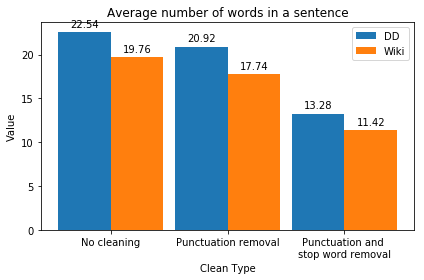

In [64]:
dd_data = [DD_analysis_0[0], DD_analysis_1[0], DD_analysis_2[0]]
wiki_data = [Wiki_analysis_0[0], Wiki_analysis_1[0], Wiki_analysis_2[0]]
plotBarGraph(dd_data, wiki_data, 'DD', 'Wiki', 'Average number of words in a sentence')

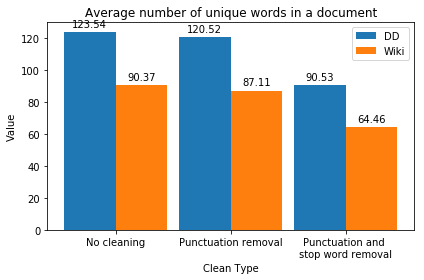

In [65]:
dd_data = [DD_analysis_0[1], DD_analysis_1[1], DD_analysis_2[1]]
wiki_data = [Wiki_analysis_0[1], Wiki_analysis_1[1], Wiki_analysis_2[1]]
plotBarGraph(dd_data, wiki_data, 'DD', 'Wiki', 'Average number of unique words in a document')

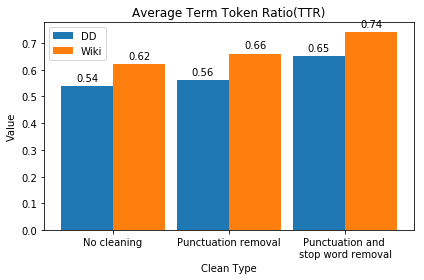

In [66]:
dd_data = [DD_analysis_0[2], DD_analysis_1[2], DD_analysis_2[2]]
wiki_data = [Wiki_analysis_0[2], Wiki_analysis_1[2], Wiki_analysis_2[2]]
plotBarGraph(dd_data, wiki_data, 'DD', 'Wiki', 'Average Term Token Ratio(TTR)')